In [1]:
# Cell 1 - Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đọc dữ liệu
df = pd.read_csv("student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


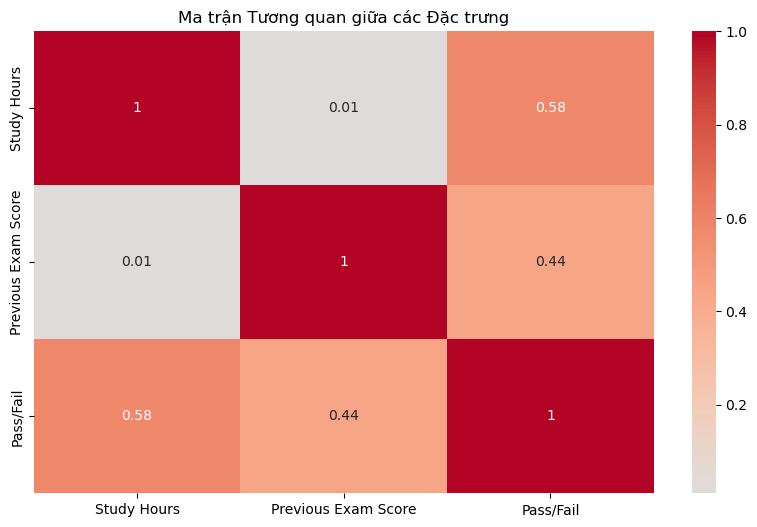

In [2]:
# Cell 2 - Phân tích tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận Tương quan giữa các Đặc trưng')
plt.show()

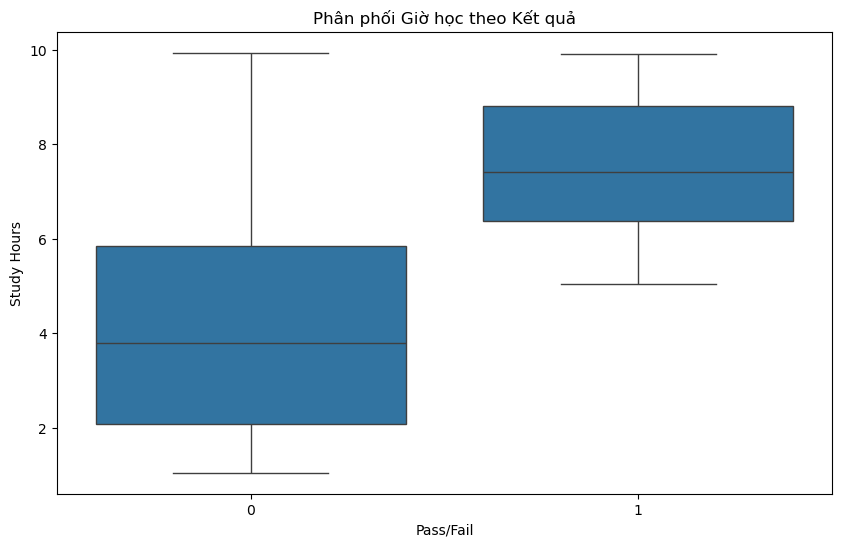

Thống kê Giờ học theo Kết quả:
           count      mean       std       min       25%       50%       75%  \
Pass/Fail                                                                      
0          316.0  4.291317  2.520633  1.045554  2.074601  3.802120  5.852919   
1          184.0  7.540606  1.434995  5.036010  6.365200  7.414408  8.807475   

                max  
Pass/Fail            
0          9.936683  
1          9.914546  


In [3]:
# Cell 3 - Phân tích giờ học
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass/Fail', y='Study Hours', data=df)
plt.title('Phân phối Giờ học theo Kết quả')
plt.show()

# In thống kê
print("Thống kê Giờ học theo Kết quả:")
print(df.groupby('Pass/Fail')['Study Hours'].describe())

In [4]:
# Cell 4 - Huấn luyện và đánh giá mô hình
X, y = df.drop(['Pass/Fail'], axis=1), df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Độ chính xác của mô hình: {accuracy_score(y_test, y_pred):.2f}")
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

Độ chính xác của mô hình: 0.86

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100



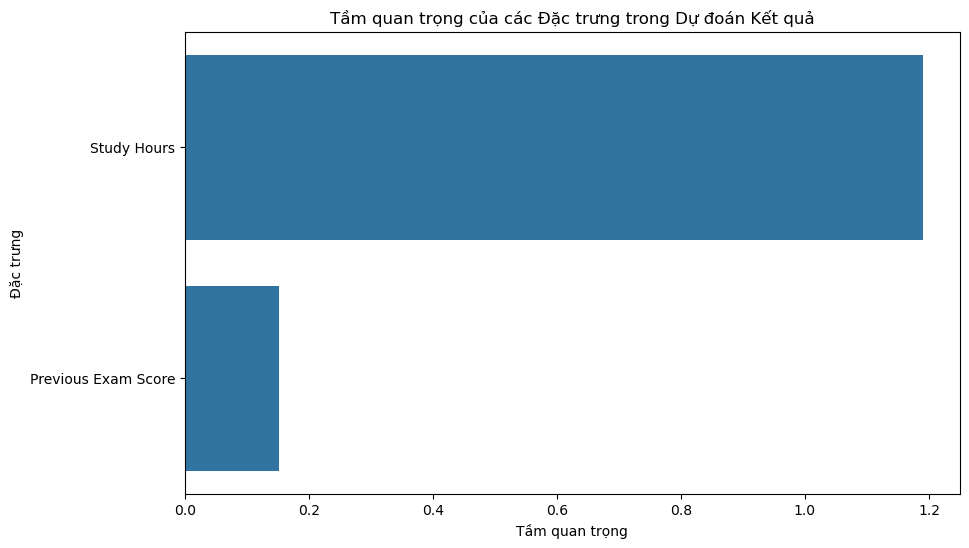

In [5]:
# Cell 5 - Phân tích tầm quan trọng của đặc trưng
feature_importance = pd.DataFrame({
    'Đặc trưng': X.columns,
    'Tầm quan trọng': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Tầm quan trọng', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Tầm quan trọng', y='Đặc trưng', data=feature_importance)
plt.title('Tầm quan trọng của các Đặc trưng trong Dự đoán Kết quả')
plt.show()

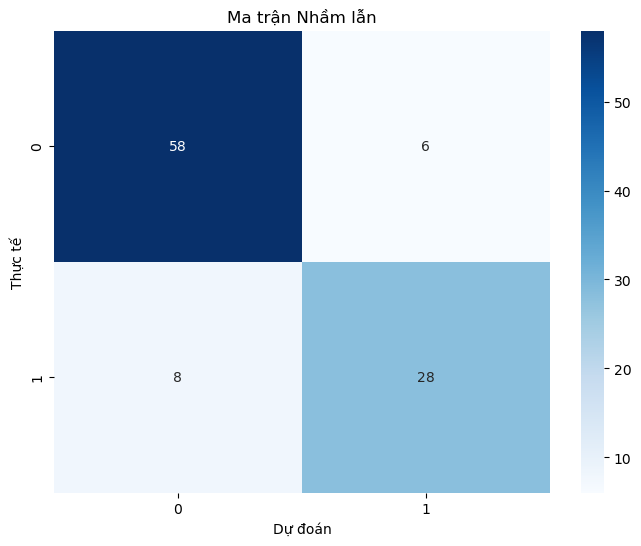

In [6]:
# Cell 6 - Ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận Nhầm lẫn')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()

Thống kê mô tả của dữ liệu:
       Study Hours  Previous Exam Score   Pass/Fail
count   500.000000           500.000000  500.000000
mean      5.487055            68.917084    0.368000
std       2.688196            17.129607    0.482744
min       1.045554            40.277921    0.000000
25%       3.171517            53.745955    0.000000
50%       5.618474            68.309294    0.000000
75%       7.805124            83.580209    1.000000
max       9.936683            99.983060    1.000000


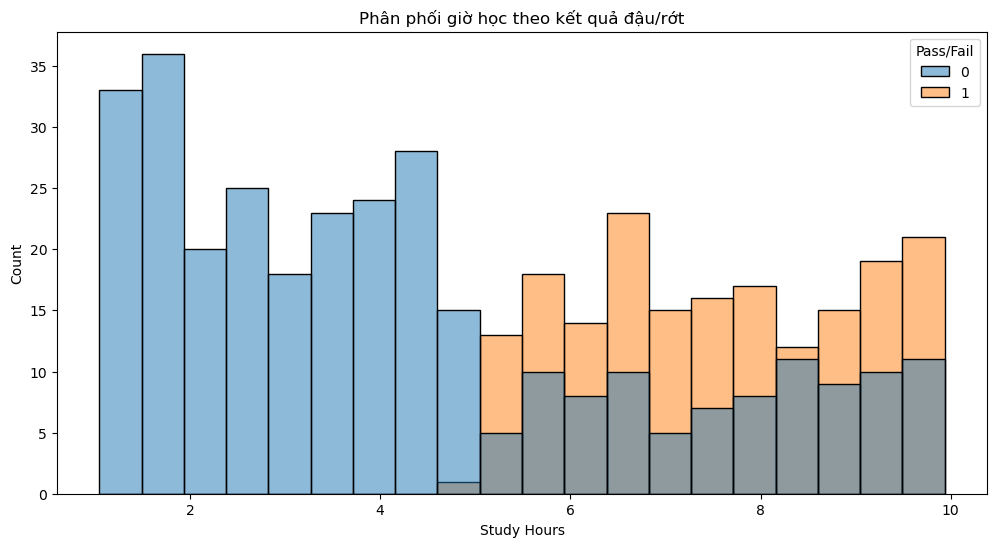

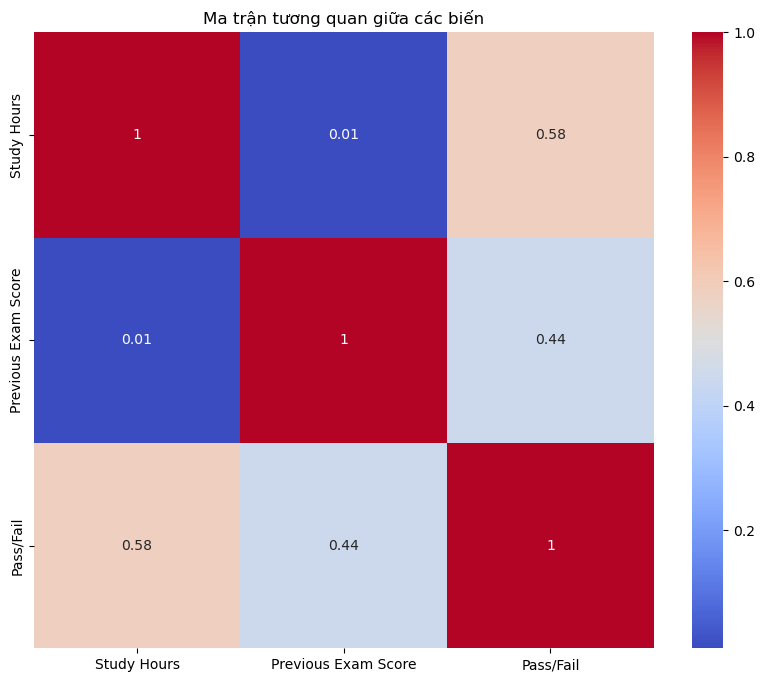


Thống kê theo nhóm đậu/rớt:
          Study Hours                              
                 mean       std       min       max
Pass/Fail                                          
0            4.291317  2.520633  1.045554  9.936683
1            7.540606  1.434995  5.036010  9.914546


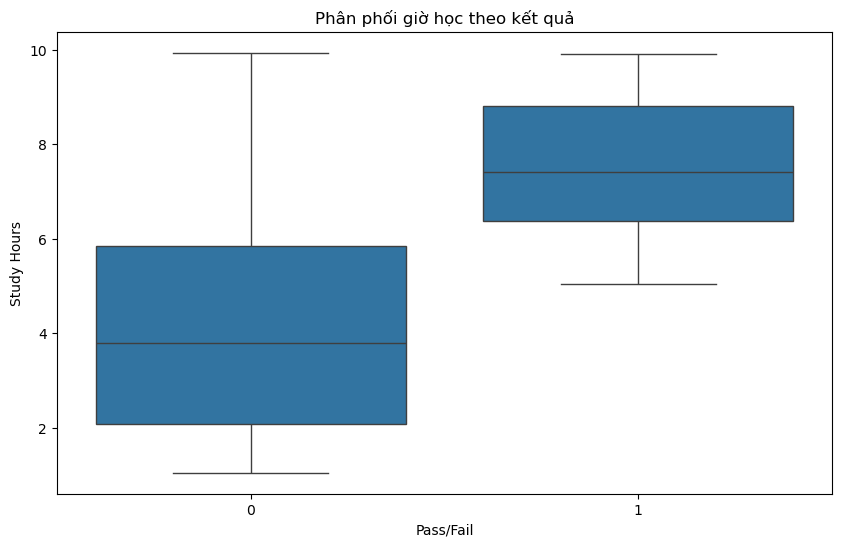

In [10]:
# 1. Phân tích thống kê mô tả
print("Thống kê mô tả của dữ liệu:")
print(df.describe())

# 2. Phân tích phân phối của các biến
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Study Hours', hue='Pass/Fail', bins=20)
plt.title('Phân phối giờ học theo kết quả đậu/rớt')
plt.show()

# 3. Phân tích tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

# 4. Phân tích chi tiết theo nhóm
print("\nThống kê theo nhóm đậu/rớt:")
print(df.groupby('Pass/Fail').agg({
    'Study Hours': ['mean', 'std', 'min', 'max']
}))

# 5. Vẽ box plot để so sánh phân phối giờ học
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass/Fail', y='Study Hours', data=df)
plt.title('Phân phối giờ học theo kết quả')
plt.show()